In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [ ]:
style.use('ggplot')

In [ ]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
             [8,8],
             [1,0.6],
             [9,11],])

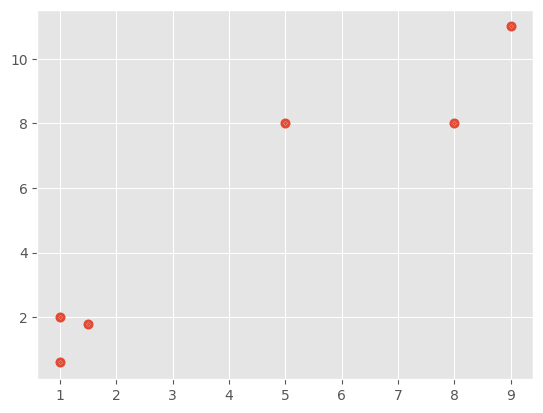

In [ ]:
plt.scatter(X[:,0],X[:,1], s=5, linewidths=5)
plt.show()

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [ ]:
centroids = clf.cluster_centers_ # Los centroides
labels = clf.labels_ # 0 o 1 visto que tenemos solo dos clusters

In [ ]:
colors = 10*['g','r','c','b','k']

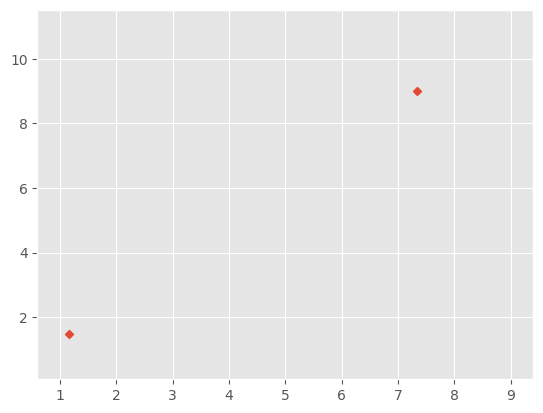

In [ ]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x',s=10,linewidths=5)
plt.show()

# Datos no numéricos

In [ ]:
df = pd.read_excel('titanic.xls')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.drop(['body','name'], axis = 1, inplace=True) # Creemos que no importan

In [ ]:
df.fillna(0,inplace=True) # Para evitar nulls

In [ ]:
def handle_non_numerical_data(df):     # Crear categorías para datos no numéricos
  columns = df.columns.values

  for column in columns:
    text_digit_vals = {} # Creamos un diccionario vacío que servirá para asignar cada valor no numérico a numérico
    def convert_to_int(val):
      return text_digit_vals[val] # Le llega el valor, ejemplo {'Female':0} Lo convertirá a 0
    if df[column].dtype != np.int64 and df[column].dtype != np.float64: # Si no es un número
      column_contents=df[column].values.tolist() # Entonces convierte los valores de la columna a una lista.
      unique_elements=set(column_contents) # Solo valores diversos
      x = 0 # Para comenzar las etiquetas desde 0, es por eso que {'Female':0}
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x # Se asigna el valor y luego aumenta más 1
          x+=1
      df[column]=list(map(convert_to_int,df[column])) # Se crea el diccionario
  return df

  # Estudiar más funciones de mapeo.

In [ ]:
df = handle_non_numerical_data(df)
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,748,211.3375,56,1,1,160
1,1,1,0,0.9167,1,2,509,151.5500,148,1,13,286
2,1,0,1,2.0000,1,2,509,151.5500,148,1,0,286
3,1,0,0,30.0000,1,2,509,151.5500,148,1,0,286
4,1,0,1,25.0000,1,2,509,151.5500,148,1,0,286
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,14.5000,1,0,360,14.4542,0,2,0,0
1305,3,0,1,0.0000,1,0,360,14.4542,0,2,0,0
1306,3,0,0,26.5000,0,0,266,7.2250,0,2,0,0
1307,3,0,0,27.0000,0,0,172,7.2250,0,2,0,0


In [ ]:
df.drop(['ticket','home.dest'], axis = 1, inplace=True)

In [ ]:
X = np.array(df.drop(['survived'], axis = 1).astype(float)) # Preparando las features

In [ ]:
X = preprocessing.scale(X)

In [ ]:
y = np.array(df['survived']) # Preparando el outcome

In [ ]:
clf = KMeans(n_clusters=2) # clf = classifier
clf.fit(X)

KMeans(n_clusters=2)

In [ ]:
correct = 0

In [ ]:
for i in range(len(X)):
  predict_me=np.array(X[i].astype(float))
  predict_me=predict_me.reshape(-1,len(predict_me))
  prediction = clf.predict(predict_me)
  if prediction[0] == y[i]:
    correct+=1

In [ ]:
print(correct/len(X))

0.2979373567608862


# Explicación de cómo funciona correct/len(x)

En tu celda, correct es solo un contador de aciertos.
Empieza en 0 y se incrementa +1 cada vez que el label que devuelve KMeans para la fila i coincide con y[i].
Luego imprimes correct/len(X), que es una accuracy bruta.

Pero ojo: con KMeans esa comparación directa no es válida porque los labels de los clusters (0 y 1) son arbitrarios. Si KMeans le pone “0” al grupo de sobrevivientes y tú esperas “1”, tu accuracy saldrá ~0.28 cuando en realidad sería ~0.72 (o viceversa). Hay que alinear los labels del cluster con los de y.

# ¿Por qué preprocesar X?

K-Means es sensible a la escala.
Si preprocesas X (estandarizas/normalizas) cambias las distancias euclidianas ⇒ cambian los centroides y cambia el clustering. Normalmente mejora porque evitas que variables con valores grandes (p. ej., fare) dominen sobre otras (p. ej., sex).

Lo que sí hace el preprocesado

Estandarizar (z-score): cada feature aporta parecido (media 0, var 1).

RobustScaler: útil si hay outliers (menos influencia de colas).

MinMax: comprime a [0,1]; útil si luego usarás distancias acotadas.

Lo que NO arregla por sí solo

Has codificado categorías como enteros (label encoding). K-Means tratará “C=2” más lejos de “A=0” que de “B=1” como si hubiese orden, lo cual es falso. Escalar no corrige eso; puede incluso empeorarlo. Para categorías:

One-Hot (mejor para pocas categorías como sex, embarked, pclass).

O descartar identificadores de alta cardinalidad (ticket, cabin) o usar otro algoritmo (k-prototypes, k-modes, Gower + k-medoids) para datos mixtos.

# Crear mi K-means

In [ ]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
             [8,8],
             [1,0.6],
             [9,11],])

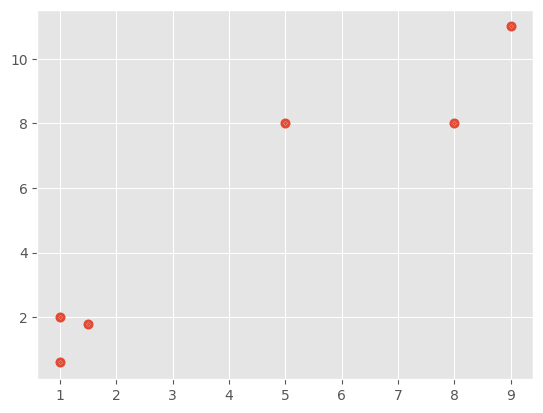

In [ ]:
plt.scatter(X[:,0],X[:,1], s=5, linewidths=5)
plt.show()

In [ ]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [ ]:
colors = ['g','r','c','b','k']

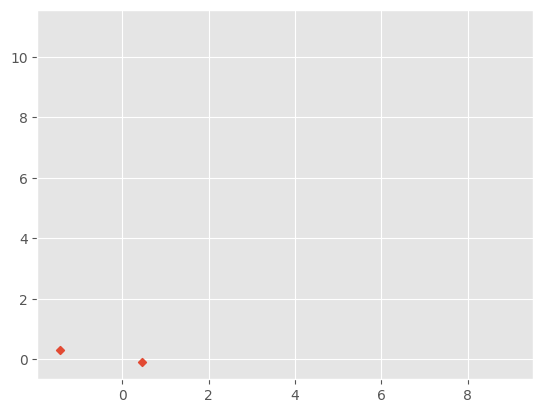

In [ ]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x',s=10,linewidths=5)
plt.show()

In [ ]:
class K_Means: # Creamos la clase de nuestro clasificador, dos clusters por default, 300 iteraciones y tolerancia de no moverse mucho
  def __init__(self, k=2, tol=0.001, max_iter=300): # Inicializar
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self,data):
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i]=data[i]

    for i in range(self.max_iter):
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in X: #deberíamos llamarlo data.
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      prev_centroids = dict(self.centroids) # Se mete al diccionario

      for classification in self.classifications:
        pass
      # self.centroids[classification] = np.average(self.classifications[classification], axis = 0)

      optimized = True

      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
          optimized = False

      if optimized: # Evita loop.
        break


  def predict(self,data):
    distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification

In [ ]:
clf = K_Means()

In [ ]:
clf.fit(X)

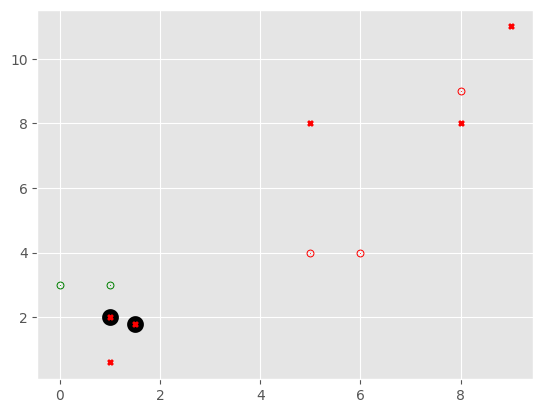

In [ ]:
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
              marker="o", color="k", s=50, linewidths=5)
for classification in clf.classifications:
  color = colors[classification] # No me funcionó esto, si lo meto en el for de abajo color=color
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0],featureset[1], marker="x", color="r", s=2,
                linewidths=5)

    unknowns = np.array ([[1,3],
                      [8,9],
                      [0,3],
                      [5,4],
                      [6,4],])
for unknown in unknowns:
  classification = clf.predict(unknown)
  plt.scatter(unknown[0], unknown[1], marker=".", color=colors[classification], s=2,
              linewidths=5)
plt.show()

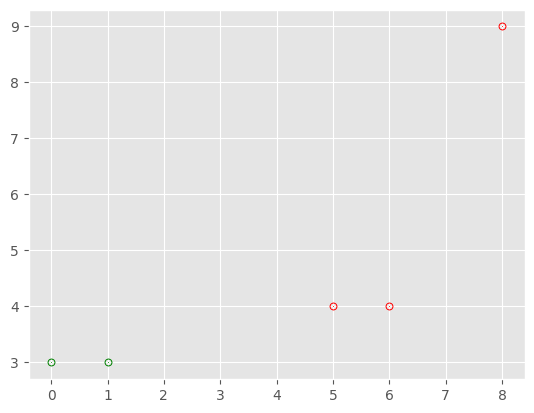

In [ ]:
unknowns = np.array ([[1,3],
                      [8,9],
                      [0,3],
                      [5,4],
                      [6,4],])
for unknown in unknowns:
  classification = clf.predict(unknown)
  plt.scatter(unknown[0], unknown[1], marker=".", color=colors[classification], s=2,
              linewidths=5)